In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('Titanic-Dataset.csv')
test = pd.read_csv('Titanic-Dataset.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


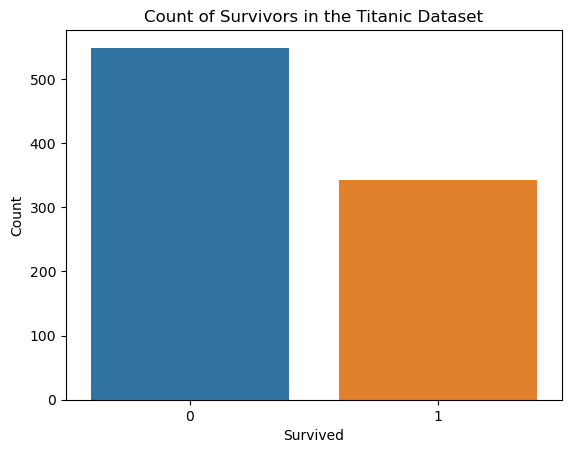

In [5]:
sns.countplot(x='Survived', data=train)
plt.title('Count of Survivors in the Titanic Dataset')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

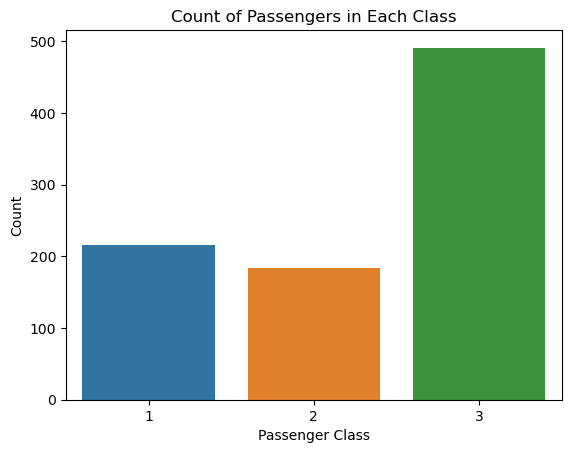

In [6]:
sns.countplot(x='Pclass', data=train)
plt.title('Count of Passengers in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


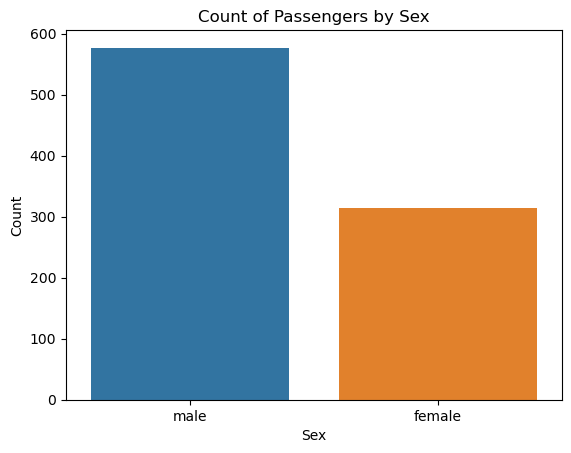

In [7]:
sns.countplot(x='Sex', data=train)
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


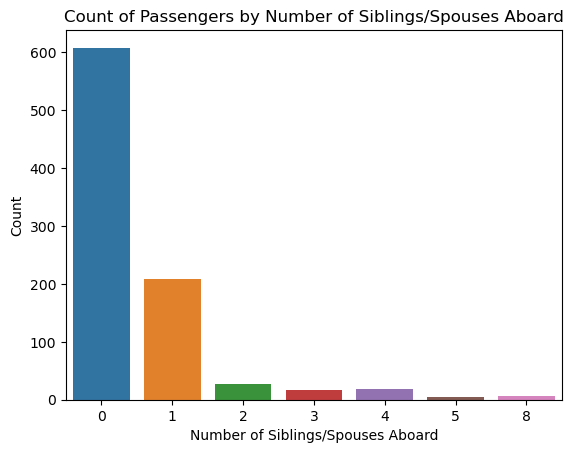

In [8]:
sns.countplot(x='SibSp', data=train)
plt.title('Count of Passengers by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.show()

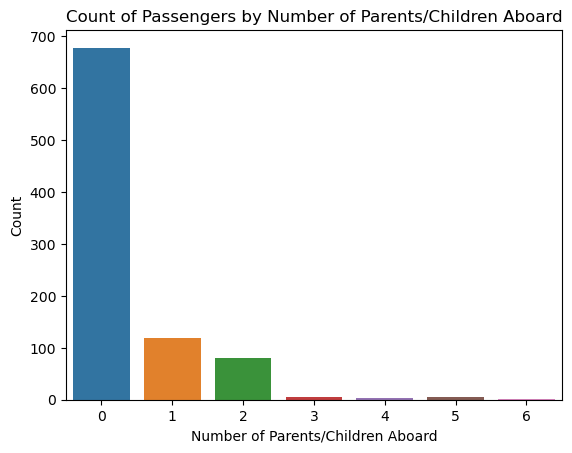

In [9]:
sns.countplot(x='Parch', data=train)
plt.title('Count of Passengers by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()


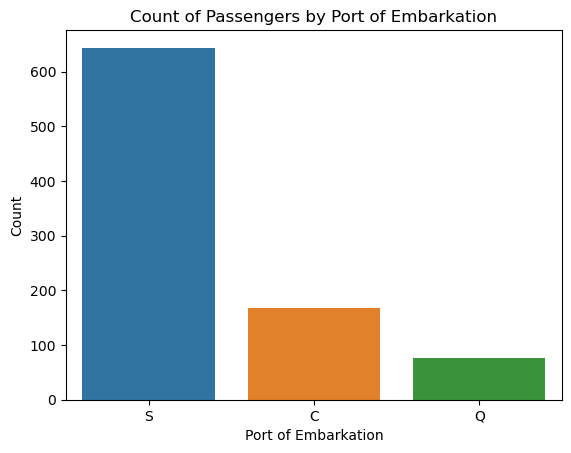

In [10]:
sns.countplot(x='Embarked', data=train)
plt.title('Count of Passengers by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()


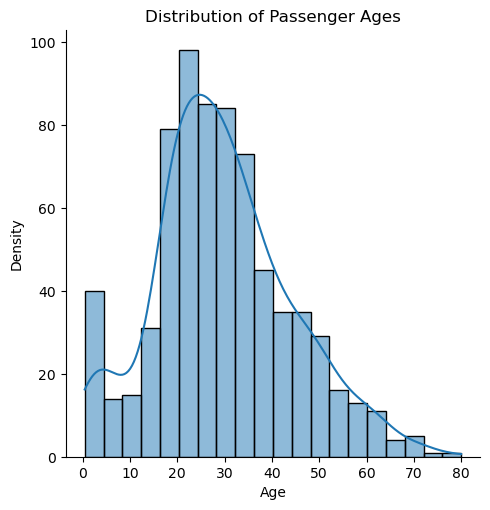

In [11]:
sns.displot(train['Age'], kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

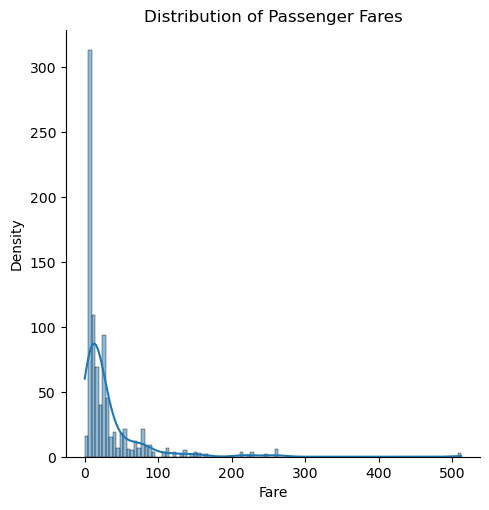

In [12]:
sns.displot(train['Fare'], kde=True)
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


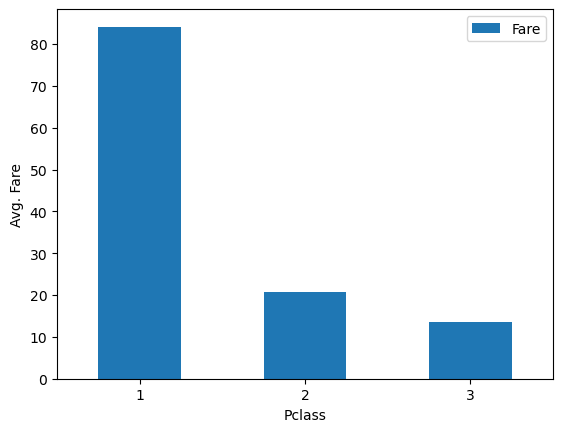

In [13]:
class_fare=train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

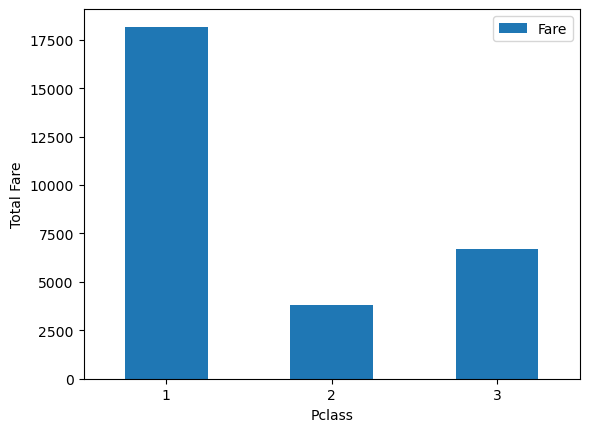

In [14]:
class_fare=train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

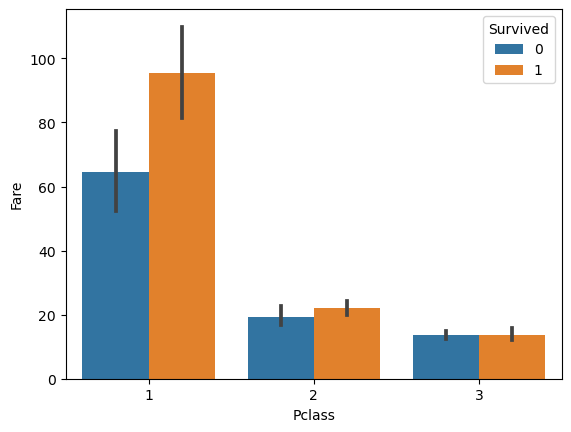

In [15]:
sns.barplot(data=train,x='Pclass',y='Fare', hue='Survived')



<Axes: xlabel='Survived', ylabel='Fare'>

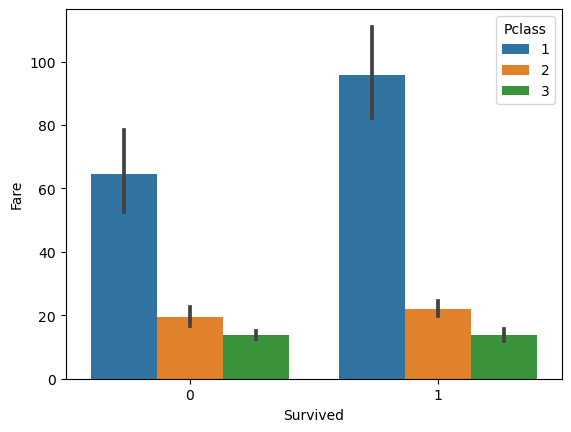

In [16]:
sns.barplot(data=train,x='Survived',y='Fare', hue='Pclass')

In [17]:
train_len=len(train)
df=pd.concat([train,test],axis=0)
df=df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1777,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
1778,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
1779,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
1780,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
1781,890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
df.isnull().sum()

index             0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             354
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [20]:

df = pd.DataFrame(df)
if 'cabin' in df.columns:
    df = df.drop(columns=['cabin'])

In [21]:
df['Age'].mean()

29.69911764705882

In [22]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [23]:
df['Embarked'].mode([0])

0    S
Name: Embarked, dtype: object

In [24]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode([0]))

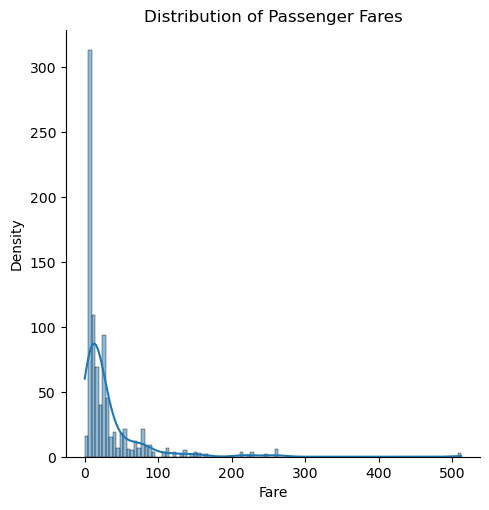

In [25]:
sns.displot(train['Fare'], kde=True)
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


In [26]:
df['Fare']=np.log(df['Fare']+1)

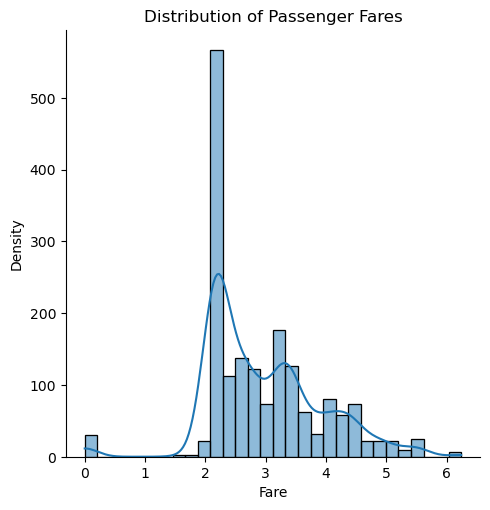

In [27]:
sns.displot(df['Fare'], kde=True)
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

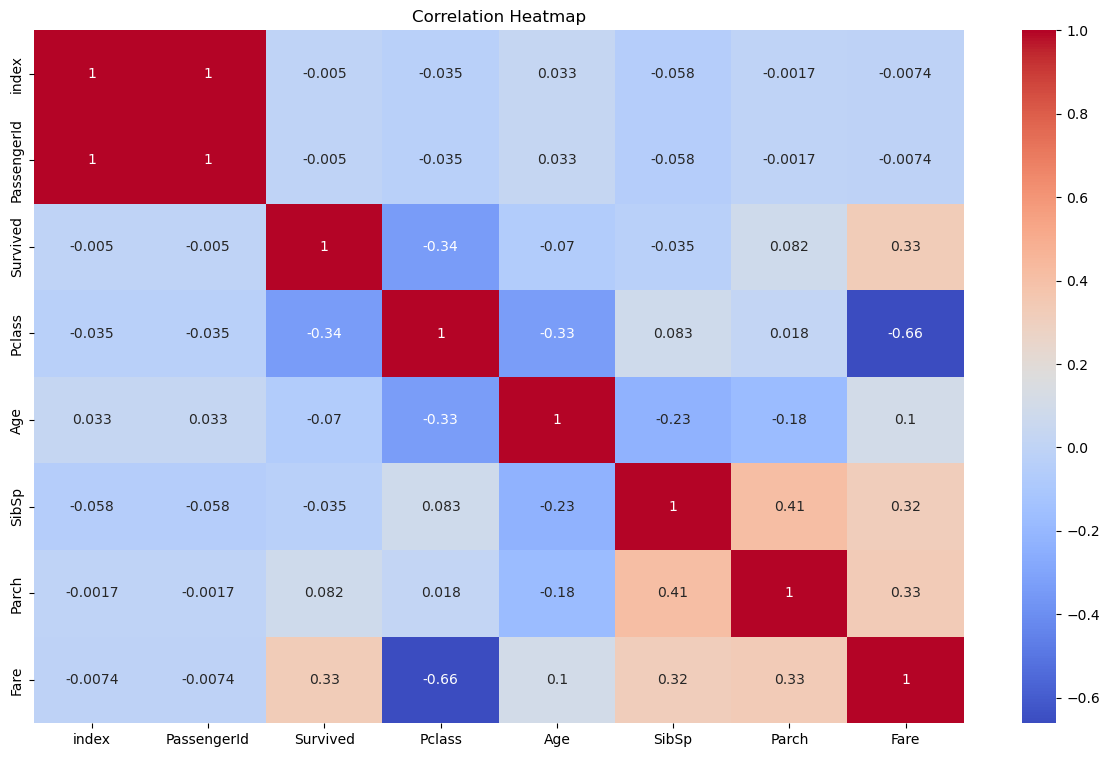

In [28]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S


In [30]:

if 'Name' in df.columns and 'Ticket' in df.columns:
    df = df.drop(columns=['Name', 'Ticket'])
print(df.head())

   index  PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
0      0            1         0       3    male  22.0      1      0  2.110213   
1      1            2         1       1  female  38.0      1      0  4.280593   
2      2            3         1       3  female  26.0      0      0  2.188856   
3      3            4         1       1  female  35.0      1      0  3.990834   
4      4            5         0       3    male  35.0      0      0  2.202765   

  Cabin Embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S  


In [31]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()
for i in cols:
    df[i]=le.fit_transform(df[i])
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.0,1,0,2.110213,NaN,2
1,1,2,1,1,0,38.0,1,0,4.280593,C85,0
2,2,3,1,3,0,26.0,0,0,2.188856,NaN,2
3,3,4,1,1,0,35.0,1,0,3.990834,C123,2
4,4,5,0,3,1,35.0,0,0,2.202765,NaN,2


In [32]:
train=df.iloc[:train_len,:]
test=df.iloc[train_len:,:]

In [33]:
train.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.0,1,0,2.110213,NaN,2
1,1,2,1,1,0,38.0,1,0,4.280593,C85,0
2,2,3,1,3,0,26.0,0,0,2.188856,NaN,2
3,3,4,1,1,0,35.0,1,0,3.990834,C123,2
4,4,5,0,3,1,35.0,0,0,2.202765,NaN,2


In [34]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
891,0,1,0,3,1,22.0,1,0,2.110213,NaN,2
892,1,2,1,1,0,38.0,1,0,4.280593,C85,0
893,2,3,1,3,0,26.0,0,0,2.188856,NaN,2
894,3,4,1,1,0,35.0,1,0,3.990834,C123,2
895,4,5,0,3,1,35.0,0,0,2.202765,NaN,2


In [35]:
X=train.drop(columns=['PassengerId','Survived'],axis=1)
y=train['Survived']

In [36]:
X.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,2.110213,NaN,2
1,1,1,0,38.0,1,0,4.280593,C85,0
2,2,3,0,26.0,0,0,2.188856,NaN,2
3,3,1,0,35.0,1,0,3.990834,C123,2
4,4,3,1,35.0,0,0,2.202765,NaN,2


In [37]:
from sklearn.model_selection import train_test_split,cross_val_score
def classify(model):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy:',model.score(x_test,y_test))
    score=cross_val_score(model,X,y,cv=5)

    print('CV_Score:',np.mean(score))
          

In [38]:
print(X.dtypes)

index         int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked      int32
dtype: object


In [39]:
X = X.drop(columns=['Cabin'])  # Replace 'Cabin' with the actual column name if needed

print(X.dtypes)

index         int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy: 0.8026905829596412
CV_Score: 0.7833845960705542


In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7623318385650224
CV_Score: 0.7611449375431548


In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.820627802690583
CV_Score: 0.7969681752557907


In [43]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV_Score: 0.7801707363002951


In [44]:
import warnings
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Suppress LightGBM warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=Warning)
    
    # Create and fit the LightGBM model
    model =  LGBMClassifier()
    classify(model)
    


[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [45]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8161434977578476
CV_Score: 0.7969618981859268


In [46]:
#both the accuracy and cv_score are high for random forest so,complete model training with full data

In [47]:
model=RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [48]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
891,0,1,0,3,1,22.0,1,0,2.110213,NaN,2
892,1,2,1,1,0,38.0,1,0,4.280593,C85,0
893,2,3,1,3,0,26.0,0,0,2.188856,NaN,2
894,3,4,1,1,0,35.0,1,0,3.990834,C123,2
895,4,5,0,3,1,35.0,0,0,2.202765,NaN,2


In [49]:
X_test=train.drop(columns=['PassengerId','Survived'],axis=1)

In [50]:
X_test.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,2.110213,NaN,2
1,1,1,0,38.0,1,0,4.280593,C85,0
2,2,3,0,26.0,0,0,2.188856,NaN,2
3,3,1,0,35.0,1,0,3.990834,C123,2
4,4,3,1,35.0,0,0,2.202765,NaN,2


In [51]:
X_test = X_test.drop(columns=['Cabin'])
pred=model.predict(X_test)
print(pred)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 